In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.fftpack as fftpack
from scipy.fftpack import fft,fftshift
from scipy.fftpack import dct
import os             
import glob
from scipy.signal import butter, sosfilt, sosfreqz
from scipy.integrate import simps
from numpy import median
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
import statistics 
from scipy.stats.mstats import gmean
from scipy.io import wavfile
from scipy import signal


In [53]:
%pwd

'C:\\Users\\berna\\A_ML_Eathquakes'

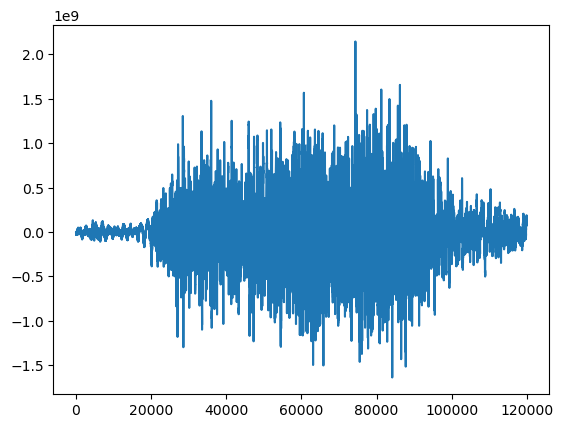

In [16]:
#   ICLISTENLF224_20150325T192217.907Zp.wav earthquake Earthquake South of Port Hardy, Vancouver Island

samplerate, data = wavfile.read('earthquake.wav')

plt.plot(data)

In [8]:
fs = samplerate
signals = data

In [9]:
aux=np.linspace(0,len(signals)-1,len(signals))
times_1=aux/fs

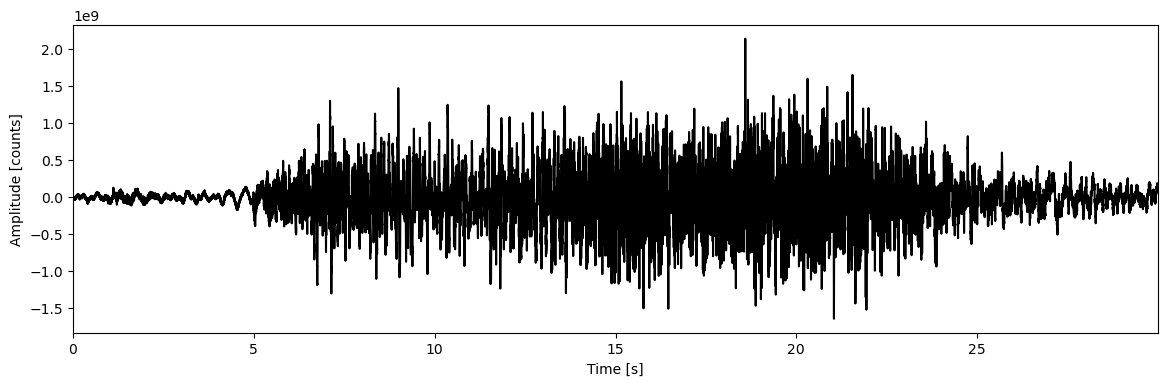

In [36]:
plt.figure(figsize=(14,4))        
plt.plot(times_1, signals, color='black')
plt.ylabel('Amplitude [counts]')
plt.xlabel('Time [s]')
#plt.xticks([])
#plt.yticks([])
plt.xlim(0, times_1[-1])
#axes.set_ylim([0,1.58*10**8])
plt.savefig('signal_web.png')

In [37]:
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=9):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y
    
def banding(signl, fs, lowcut, highcut):
    x=signl-np.mean(signl)
    length1=len(x)
    time=np.linspace(0, round(length1), round(length1))/fs
    y1 = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    return(time,x, y1)

def pow_sig(x,S):
    frames = []
    nframes = int((len(x))/S)
    r=x-np.mean(x)
    for t in range(0,nframes):
        aux=r[(t*S):(t*S+S)]
        aux2=np.square(aux)
        frames.append(np.copy(sum(aux2)))
    return(frames)

In [38]:
import pywt
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


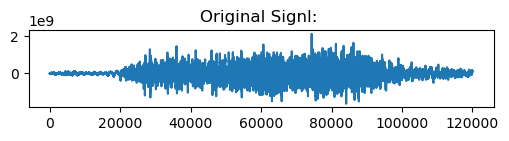

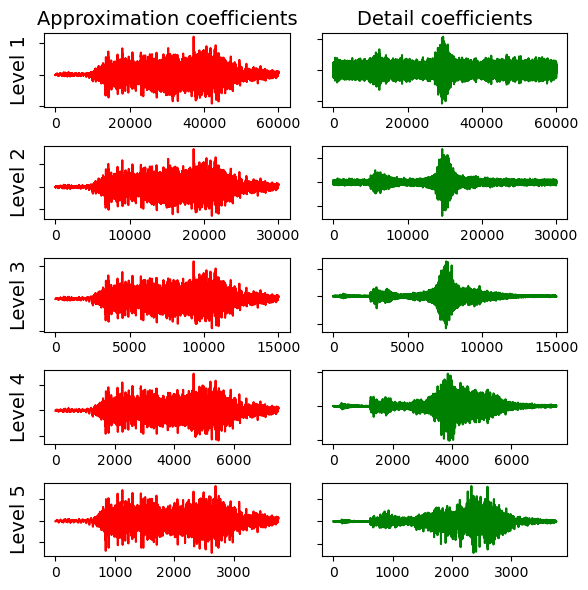

In [39]:
import pywt
 
signl = signals
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Signl: ")
ax.plot(signl)
plt.show()
    
data = signl
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
#plt.show()
plt.savefig('wavelet_coeffs_web.png')

In [40]:
times_1
signl = signals
fs = samplerate

In [41]:
scales = np.arange(1, 128)  # specify the range of scales (wavelet widths)
coefficients, frequencies = pywt.cwt(signl, scales, 'morl') 

In [42]:
sampling_frequency = samplerate  # Example sampling frequency (Hz)
num_scales = 128  # Number of scales used in the scalogram

# Approximate the frequencies corresponding to each scale
frequencies = sampling_frequency / np.arange(1, num_scales+1)

print(np.shape(coefficients))

(127, 120000)


[4000.         2000.         1333.33333333 1000.          800.
  666.66666667  571.42857143  500.          444.44444444  400.
  363.63636364  333.33333333  307.69230769  285.71428571  266.66666667
  250.          235.29411765  222.22222222  210.52631579  200.
  190.47619048  181.81818182  173.91304348  166.66666667  160.
  153.84615385  148.14814815  142.85714286  137.93103448  133.33333333
  129.03225806  125.          121.21212121  117.64705882  114.28571429
  111.11111111  108.10810811  105.26315789  102.56410256  100.
   97.56097561   95.23809524   93.02325581   90.90909091   88.88888889
   86.95652174   85.10638298   83.33333333   81.63265306   80.
   78.43137255   76.92307692   75.47169811   74.07407407   72.72727273
   71.42857143   70.1754386    68.96551724   67.79661017   66.66666667
   65.57377049   64.51612903   63.49206349   62.5          61.53846154
   60.60606061   59.70149254   58.82352941   57.97101449   57.14285714
   56.33802817   55.55555556   54.79452055   54.054054

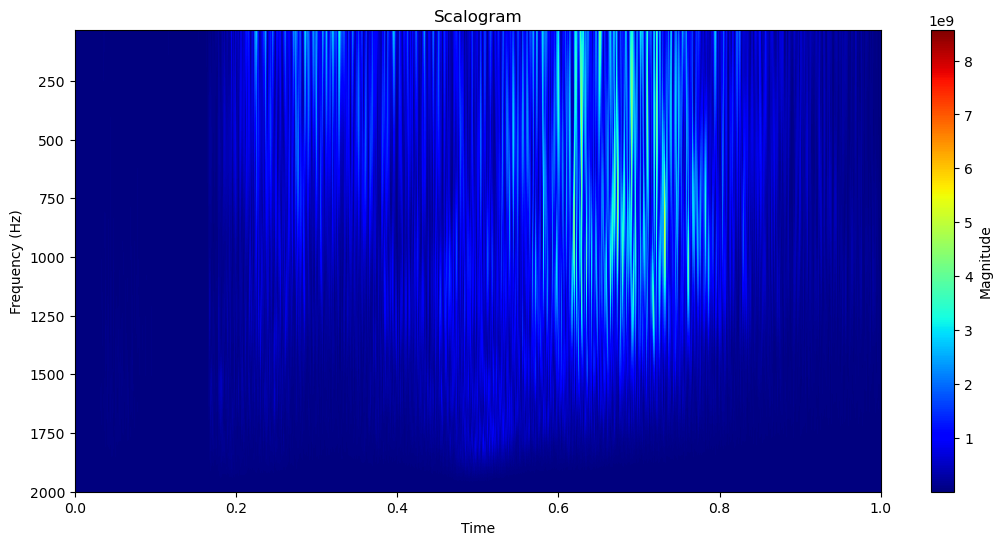

In [46]:
plt.figure(figsize=(13, 6))
plt.imshow(np.abs(coefficients), extent=[0, 1, frequencies[-1], frequencies[0]/2], aspect='auto', cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Scalogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.gca().invert_yaxis()  # invert y-axis for better visualization
# axes = plt.gca()
#axes.set_xlim([1/250,1/25])
# axes.set_ylim([0,10])
#plt.show()
plt.savefig('scalogram_web.png')

print(frequencies)

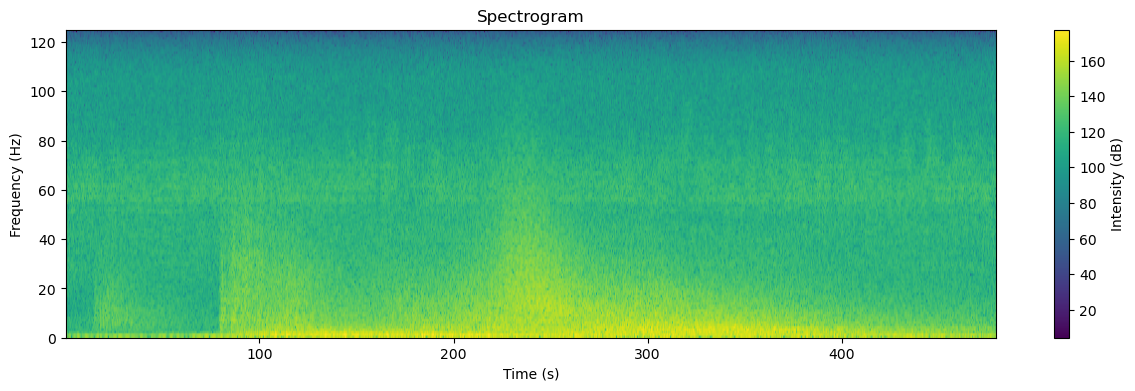

In [48]:
plt.figure(figsize=(15, 4))
plt.specgram(signl, Fs=250)  # Fs is the sampling frequency (Hz)
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')


plt.savefig('spectrogram_web.png')


C:\Users\berna\AppData\Local\Temp\ipykernel_17400\4258133872.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axes.set_xlim([0,125])


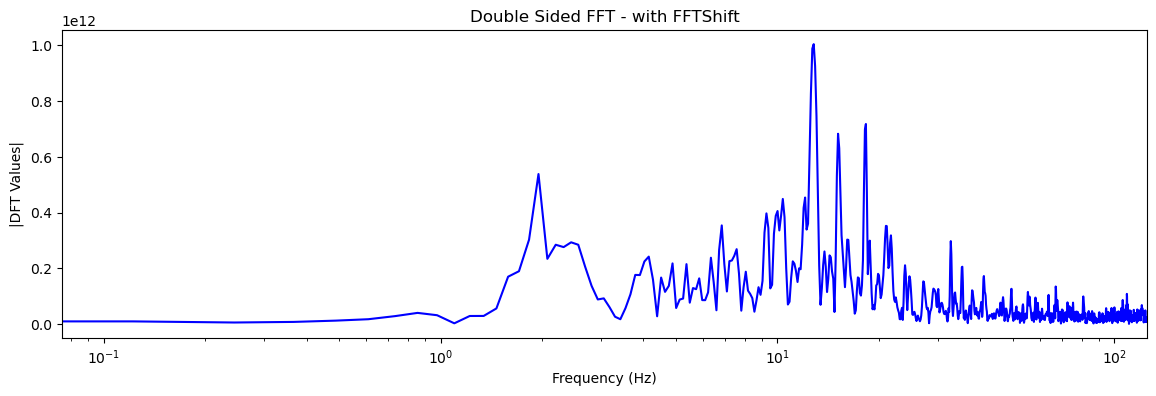

In [52]:
from scipy import signal
x = signals
x = signal.detrend(x)
fs = samplerate
NFFT=1024*32 #NFFT-point DFT
X=fftshift(fft(x,NFFT)) # X=fft(x,NFFT)  compute DFT using FFT

fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT  # index for FFT plot

plt.figure(figsize=(14,4))
plt.plot(fVals,np.abs(X), 'b')
plt.ylabel('|DFT Values|')
plt.title('Double Sided FFT - with FFTShift')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')  # Set x-axis to logarithmic scale
axes = plt.gca()
axes.set_xlim([0,125])

plt.savefig('spectrum_web.png')


In [ ]:
banded_signals1=[]
banded_signals2=[]
banded_signals3=[]
banded_signals4=[]
banded_signals5=[]
banded_signals6=[]
banded_signals7=[]
banded_signals8=[]
    
signal = signals
(time1, x, y1) = banding(signal,250, 0.1, 0.5)

signl = signals
(time2, x, y2) = banding(signl,250, 1, 10)

signl = signals
(time3, x, y3) = banding(signl,250, 10, 20)

signl = signals
(time4, x, y4) = banding(signl,250, 20, 30)

signl = signals
(time5, x, y5) = banding(signl,250, 30, 40)

signl = signals
(time6, x, y6) = banding(signl,250, 40, 50)

signl = signals
(time7, x, y7) = banding(signl,250, 50, 60)

signl = signals
(time8, x, y8) = banding(signl,250, 60, 70)

signl = signals
(time9, x, y9) = banding(signl,250, 70, 80)

signl = signals
(time9, x, y10) = banding(signl,250, 80, 90)

signl = signals
(time9, x, y11) = banding(signl,250, 90, 100)

signl = signals
(time9, x, y12) = banding(signl,250, 100, 110)

signl = signals
(time9, x, y13) = banding(signl,250, 110, 120)

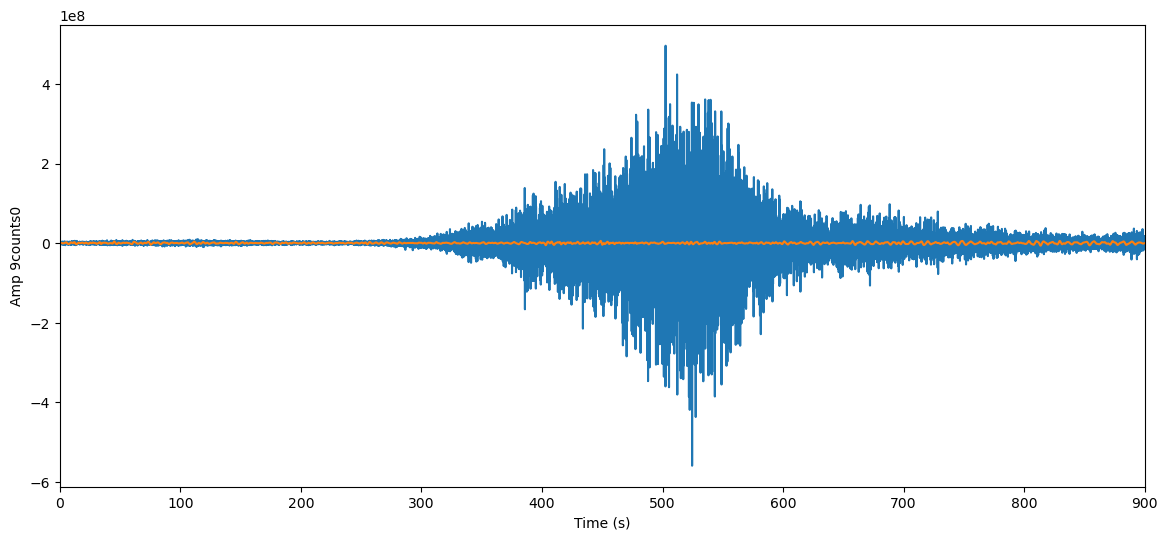

In [37]:
plt.figure(figsize=(14,6))     
plt.plot(time2, y2)
plt.plot(time1, y1)
plt.xlabel('Time (s)')
plt.ylabel('Amp 9counts0')
axes = plt.gca()
#axes.set_xlim([1/250,1/25])
axes.set_xlim([0, time2[-1]])
plt.show()